In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
fd = pd.read_csv("scholarship.csv")

In [41]:
fd2 = fd.copy()

In [42]:
fd.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


C:\Users\raghu\AppData\Local\Temp\ipykernel_12700\468857922.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fd["scholarship_exam_marks"])
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

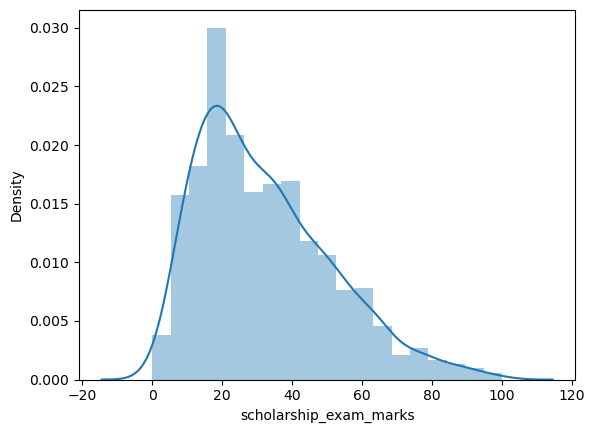

In [43]:
sns.distplot(fd["scholarship_exam_marks"])


In [44]:
Q1 = fd["scholarship_exam_marks"].quantile(0.25)
Q3 = fd["scholarship_exam_marks"].quantile(0.75)
IQR = Q3-Q1

## 1.Trimming

In [45]:
fd[(fd["scholarship_exam_marks"] < Q1 - 1.5*IQR) |  (fd["scholarship_exam_marks"] > Q3 + 1.5*IQR)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


In [46]:
fd[(fd["scholarship_exam_marks"] >  Q1 - 1.5*IQR) &  (fd["scholarship_exam_marks"] < Q3 + 1.5*IQR)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


## 2.Capping

In [47]:
fd["scholarship_exam_marks"] = np.where(fd["scholarship_exam_marks"] < Q1 - 1.5*IQR,Q1 - 1.5*IQR,
                                       np.where(fd["scholarship_exam_marks"] > Q3 + 1.5*IQR,Q3 + 1.5*IQR,fd["scholarship_exam_marks"]))

C:\Users\raghu\AppData\Local\Temp\ipykernel_12700\2516679791.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fd["scholarship_exam_marks"])
C:\Users\raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\raghu\AppData\Local\Temp\ipykernel_12700\2516679791.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
sim

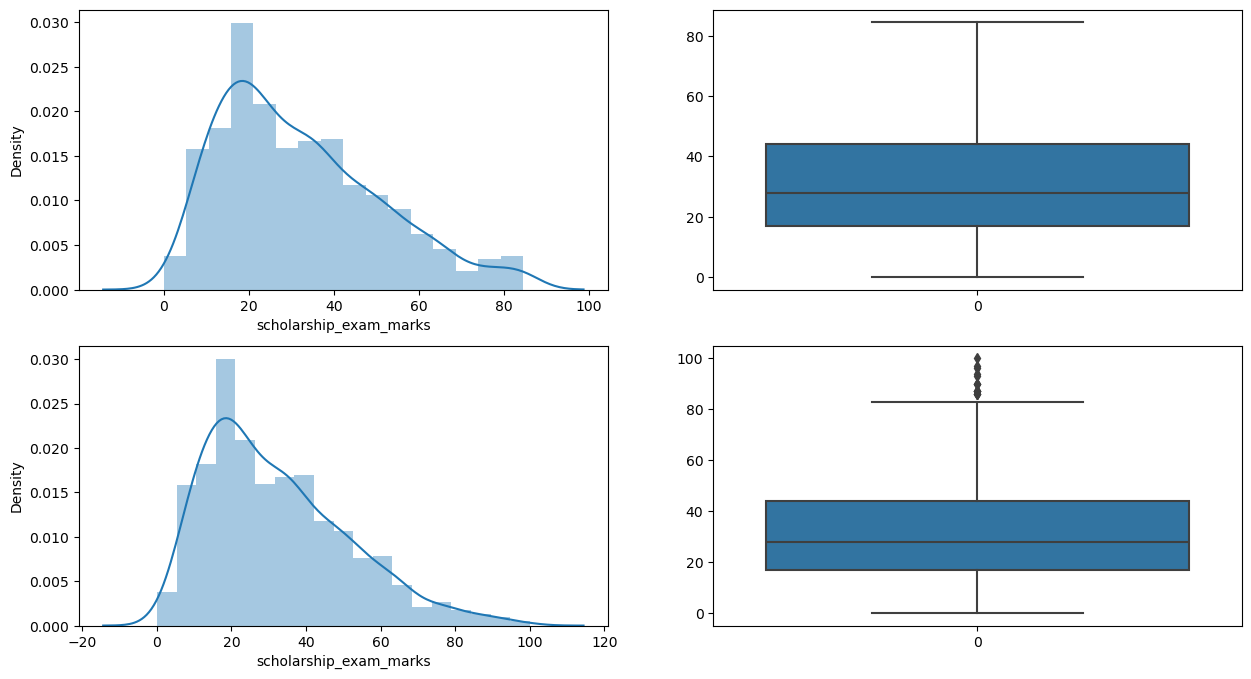

In [51]:
plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
sns.distplot(fd["scholarship_exam_marks"])
plt.subplot(2,2,2)
sns.boxplot(fd["scholarship_exam_marks"])
plt.subplot(2,2,3)
sns.distplot(fd2["scholarship_exam_marks"])
plt.subplot(2,2,4)
sns.boxplot(fd2["scholarship_exam_marks"])
plt.show()